In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()


In [2]:
data=pd.read_csv(r"C:\Users\JOHAN\Desktop\2020-II\PC2_HOJA_REPITENCIAS.csv",sep=";",index_col='No.')

In [131]:
data.head(5)

,Codigo,Apellidos y Nobres,Cursos_repitencia,Sem.pert,1R,2R,3R,4R,Otros,Repitencia
No.,,,,,,,,,,
1,18200205,Valenzuela Martinez Alessandro Gregory,PROGRAMACIÓN Y FUNDAMENTOS DE ALGORÍTMICA,3,1,0,0,0,0,1
2,18200205,Valenzuela Martinez Alessandro Gregory,TEORÍA GENERAL DE SISTEMAS,3,1,0,0,0,0,1
3,18200205,Valenzuela Martinez Alessandro Gregory,MATEMÁTICAS DISCRETAS,3,1,0,0,0,0,1
4,18200205,Valenzuela Martinez Alessandro Gregory,PROCESOS DE NEGOCIOS,4,1,0,0,0,0,1
5,18200129,Acuña Anampa Britney Jennifer,NaN,0,0,0,0,0,0,0


In [4]:
#exploracion de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 1 to 46
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Codigo              46 non-null     int64 
 1   Apellidos y Nobres  46 non-null     object
 2   Cursos_repitencia   33 non-null     object
 3   Sem.pert            46 non-null     int64 
 4   1R                  46 non-null     int64 
 5   2R                  46 non-null     int64 
 6   3R                  46 non-null     int64 
 7   4R                  46 non-null     int64 
 8   Otros               46 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 3.6+ KB


In [5]:
colum_numerica=[col for col in data.columns if data[col].dtype in ('int64','float64')]
colum_texto=[col for col in data.columns if data[col].dtype=='object']

In [6]:
print("------COLUMNAS NUMERICAS-----")
print("\n".join(colum_numerica))
print("------COLUMNAS TEXTO--------")
print("\n".join(colum_texto))

------COLUMNAS NUMERICAS-----
Codigo
Sem.pert
1R
2R
3R
4R
Otros
------COLUMNAS TEXTO--------
Apellidos y Nobres
Cursos_repitencia


C:\Users\JOHAN\anaconda3\envs\mlearning\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\JOHAN\anaconda3\envs\mlearning\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\JOHAN\anaconda3\envs\mlearning\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


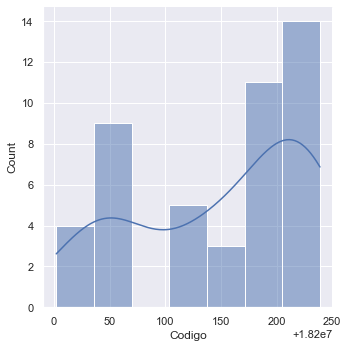

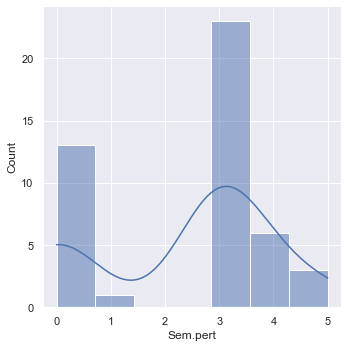

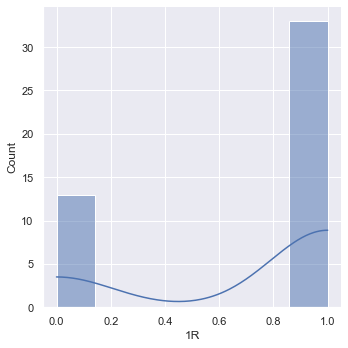

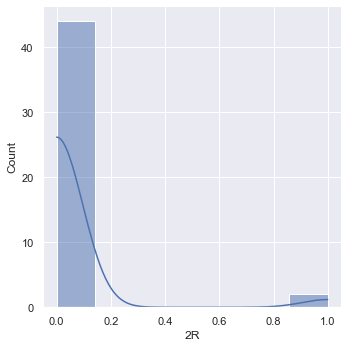

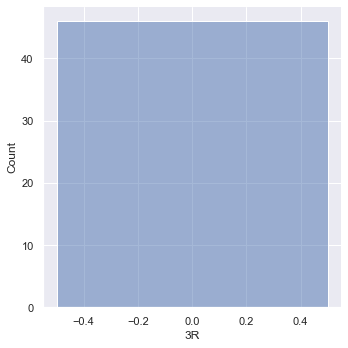

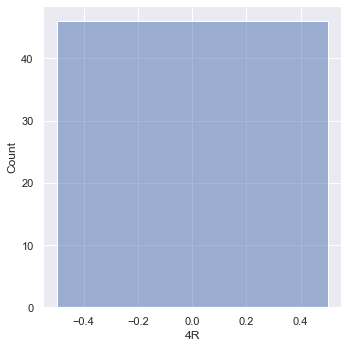

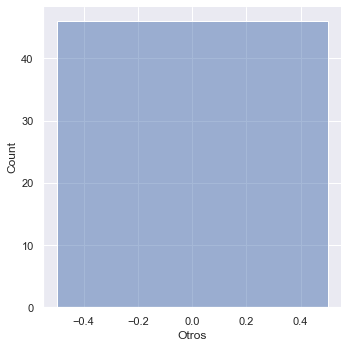

In [7]:
for col in colum_numerica:
    sns.displot(data[col],kde=True)

In [8]:
#los datos que deben filtrarse son de Nombres, codigo
#ahora analizamos los valores faltantes
data.isnull().sum(axis=0)

Codigo                 0
Apellidos y Nobres     0
Cursos_repitencia     13
Sem.pert               0
1R                     0
2R                     0
3R                     0
4R                     0
Otros                  0
dtype: int64

In [9]:
#Tanto el nombre de cursos, como la suma de las repitancias nos aportan lo mismo
#ya que la existencia de un valor en el nombre indica que repitio en caso contrario no.
#la suma de las 3 variables de repitencia si es mayor a 0 entonces repitio, en caso contrario no.
#si lo vemos de esa forma solo usamos la logica de programacion para saber si aprobó o no y no entraria machine learning y esto esta mal
#SOLUCION: Discretizar las 4 columnas R1,R2,R3,y cursos repitencia,en una sola columna y podemos demostrarlo con la siguiente correlacion

In [15]:
#creamos una variable artificial
data['Repitencia']= np.where((data['Cursos_repitencia']!=np.nan )& ((data['1R']+data['2R']+data['3R']-data['Otros'])>0),1,0)

In [16]:
data['Repitencia'][:5]

No.
1    1
2    1
3    1
4    1
5    0
Name: Repitencia, dtype: int32

In [17]:
data.head()

,Codigo,Apellidos y Nobres,Cursos_repitencia,Sem.pert,1R,2R,3R,4R,Otros,Repitencia
No.,,,,,,,,,,
1,18200205,Valenzuela Martinez Alessandro Gregory,PROGRAMACIÓN Y FUNDAMENTOS DE ALGORÍTMICA,3,1,0,0,0,0,1
2,18200205,Valenzuela Martinez Alessandro Gregory,TEORÍA GENERAL DE SISTEMAS,3,1,0,0,0,0,1
3,18200205,Valenzuela Martinez Alessandro Gregory,MATEMÁTICAS DISCRETAS,3,1,0,0,0,0,1
4,18200205,Valenzuela Martinez Alessandro Gregory,PROCESOS DE NEGOCIOS,4,1,0,0,0,0,1
5,18200129,Acuña Anampa Britney Jennifer,NaN,0,0,0,0,0,0,0


<AxesSubplot:>

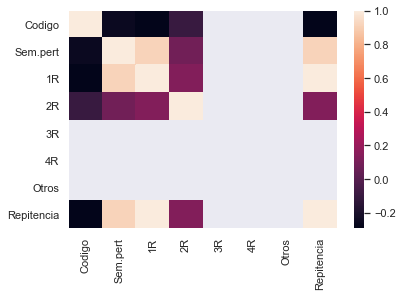

In [18]:
sns.heatmap(data.corr(method="pearson"))

In [20]:
#luego podemos concluir que la variable repitencia, esta correlacionada con el SemestrePert
#un indicador curiosos que nos dice que a medida que aumentan los semestres hay mas repitencias
#las variables 3R.4R.Otros, no aportan al modelo, es decir no estan correlacionadas con la variable objetivo
#la variable 1R esta correlacionada
#la variables codigo no esta correlacionada
#Es decir solo nos quedamos con Sem.Pert, 1R, 2R ... pero como habiamos dicho, tener 1R y 2R aporta lo mismo que tener
#la variable repitencia debido a que esta relacionada a la precencia de un curso y la suma de estos
#entonces solo nos quedamos con Semestre.pert


In [30]:
data_repitencias=data[['Codigo','Sem.pert','Repitencia']]

In [21]:

#ahora nos faltan mas datos,por lo cual convocamos ala data de calificaciones
data_calificaciones=pd.read_csv(r"C:\Users\JOHAN\Desktop\2020-II\HOJA_1_CALIFICACIONES.csv",sep=";")

In [22]:
data_calificaciones.head()

,No.,Codigo,Apellidos y Nobres,Escuela,Plan Estudio,Edad,Sexo,No.cur-rep,No.asig-mat,No.cred.Mat,Prom.pond,Cred.faltante,Total.Cred,Cred.Llevad
0,1,18200129,Acuña Anampa Britney Jennifer,Sistemas,2018,20,F,0,7,22,13.728,99,213,114
1,2,18200002,"Alonso Varillas, Margorie Margarita",Sistemas,2018,21,F,2,7,22,14.211,99,213,114
2,3,18200055,Altamirano Alca Fernando,Sistemas,2018,20,M,0,7,22,14.904,99,213,114
3,4,18200057,Avila Velasquez Luis Enrique,Sistemas,2018,22,M,0,7,22,14.351,99,213,114
4,5,18200008,"Cacho Leon, César Francisco",Sistemas,2018,19,M,3,7,22,12.435,102,213,111


In [25]:
data_calificaciones=data_calificaciones[['Codigo','Edad','Sexo',"No.cur-rep",'Prom.pond']]

In [26]:
data_calificaciones.head()

,Codigo,Edad,Sexo,No.cur-rep,Prom.pond
0,18200129,20,F,0,13.728
1,18200002,21,F,2,14.211
2,18200055,20,M,0,14.904
3,18200057,22,M,0,14.351
4,18200008,19,M,3,12.435


In [31]:
#mezclamos los datos uniendolos por el codigo
data_merge=data_calificaciones.merge(data_repitencias,how='inner',on='Codigo')

In [32]:
data_merge.head(10)

,Codigo,Edad,Sexo,No.cur-rep,Prom.pond,Sem.pert,Repitencia
0,18200129,20,F,0,13.728,0,0
1,18200002,21,F,2,14.211,3,1
2,18200002,21,F,2,14.211,3,1
3,18200058,23,M,1,13.901,5,1
4,18200059,19,M,0,14.719,0,0
5,18200139,21,M,0,14.377,0,0
6,18200216,21,M,0,13.816,0,0
7,18200217,21,M,0,14.061,0,0
8,18200019,22,M,1,13.246,3,1
9,18200148,19,M,0,14.450,0,0


In [33]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 45
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Codigo      46 non-null     int64  
 1   Edad        46 non-null     int64  
 2   Sexo        46 non-null     object 
 3   No.cur-rep  46 non-null     int64  
 4   Prom.pond   46 non-null     float64
 5   Sem.pert    46 non-null     int64  
 6   Repitencia  46 non-null     int32  
dtypes: float64(1), int32(1), int64(4), object(1)
memory usage: 2.7+ KB


In [35]:
#no hay valores faltantes
#luego codificamos la variable sexo
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
data_merge['Sexo']=encoder.fit_transform(data_merge['Sexo'])

In [36]:
data_merge.head()

,Codigo,Edad,Sexo,No.cur-rep,Prom.pond,Sem.pert,Repitencia
0,18200129,20,0,0,13.728,0,0
1,18200002,21,0,2,14.211,3,1
2,18200002,21,0,2,14.211,3,1
3,18200058,23,1,1,13.901,5,1
4,18200059,19,1,0,14.719,0,0


<AxesSubplot:>

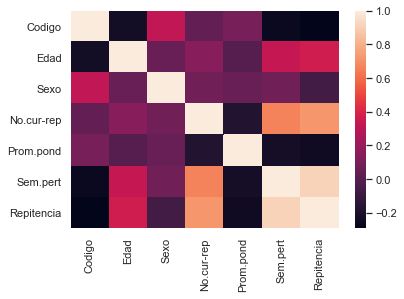

In [37]:
#ahora podemos ver la correlacion de variables
sns.heatmap(data_merge.corr(method="pearson"))

In [72]:
#preparacion de datos
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [73]:
#eliminamos el codigo de estudiante porque noss sirvio para el merge
data_merge=data_merge.drop('Codigo',axis=1)

In [74]:
#separacion de datos
X=data_merge.drop('Repitencia',axis=1).values
y=data_merge['Repitencia'].values
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)


In [75]:
#escalamiento de datos
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [86]:
#ahora escogemos el modelo de maquinas de soporte vectorial
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=400,max_depth=7)

In [87]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=400)

In [88]:
model.score(x_test,y_test)

1.0

In [89]:
y_pred=model.predict(x_test)

In [90]:
#ahora vemos el reporte de clasificacion basico
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)

In [91]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         7

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [92]:
np.unique(y_pred)

array([0, 1])

<AxesSubplot:>

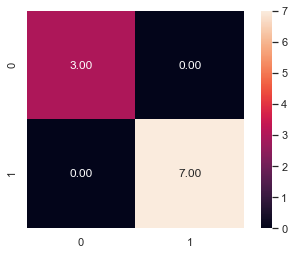

In [95]:
#ahora inspeccionamos la matriz de confusion
from sklearn.metrics import confusion_matrix

conf=confusion_matrix(y_test,y_pred)
sns.heatmap(conf,fmt='0.2f',square=True,annot=True)

In [125]:
#creamos la funcion de soporte
def predecir_repitencia(edad,sexo,cursos_recup,promedio,semestre):
    sexo=encoder.transform([sexo])
    dat=np.array([[edad,sexo[0],cursos_recup,promedio,semestre]])
    dat=scaler.transform(dat)
    result=model.predict(dat)
    if(result[0]==0):
        print("NO tiene una repitencia el semestre {0}".format(semestre))
    else:
        print("SI tiene una repitencia el semestre {0}".format(semestre))

In [126]:
predecir_repitencia(20,'M',0,14.2,5)

SI tiene una repitencia el semestre 5


In [127]:
#por ultimo guardamos el modelo
import joblib
joblib.dump(model,"modelo_clasificacion_repitencias.pkl")

['modelo_clasificacion_repitencias.pkl']

In [129]:
predecir_repitencia(23,'F',1,13.789,7)

SI tiene una repitencia el semestre 8
